36
9
41
39
28
7
19
4
9
20
10
40
27
3
32
29
38
26
11
12
18
15
15
22
47
31
39
36
30
25
26
18
34
5
19
6
34
4
9
35
18
31
7
6
33


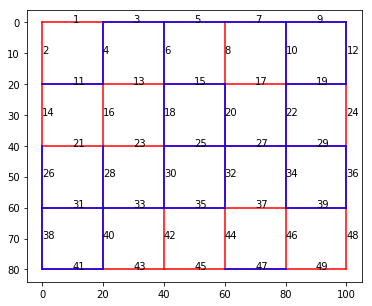

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random
width = 100
height = 80
step = 20

objectsInRow = width / step * 2
colCount = width / step + 1
rowCount = height / step + 1
numObjectsInRows = (width / step) * rowCount
numObjectsInCols = (height / step) * colCount
maxVertObjects = ((height / step) * colCount)*2 + 1
maxHorObjects = ((width / step) * rowCount)*2 
maxObjects = int(numObjectsInRows + numObjectsInCols)

plt.rcParams["figure.figsize"] = [colCount,rowCount]
plt.gca().invert_yaxis() 
x = []
y = []
usedElementsList = []
currentPath = []

def drawLine(i, color, text):
    if (i % 2 == 1):
        rowNum = i // objectsInRow
        colNum = ((i - rowNum*objectsInRow) + 1) // 2 - 1
        xStart = colNum * step
        yStart = rowNum * step
        plt.plot([xStart, (xStart+step)],[yStart, yStart], color)
        if (text):
            plt.text(xStart+step/2, yStart, i)
    else:
        rowNum = (i - 1) // (objectsInRow + 2)
        colNum = ((i - rowNum*(objectsInRow + 2)) - 2) // 2
        xStart = colNum * step
        yStart = rowNum * step
        plt.plot([xStart, (xStart)],[yStart, yStart + step], color)
        if (text):
            plt.text(xStart, yStart+step/2, i) 

def generateGrid():
    for i in range(1, maxObjects+1):
        drawLine(i, 'r', True)

def getIdByRowAndColumn(row, column, horizontal):
    i=0
    if (horizontal):
        i = ((row+1) * (colCount-1) - ((colCount-1) - column - 1)) * 2 - 1
    else:
        i = ((row+1) * colCount - (colCount - column - 1)) * 2
    return int(i)
        
def findNeighbours(element):
    neighbours = []
    if (element % 2 == 1):
        rowNum = element // objectsInRow
        colNum = ((element - rowNum*objectsInRow) + 1) // 2 - 1
        if (colNum > 0):
            neighbours.append(element - 2)
        if (colNum < colCount-2):
            neighbours.append(element + 2)
        if (rowNum > 0):
            neighbours.append(getIdByRowAndColumn(rowNum-1, colNum, False))
            neighbours.append(getIdByRowAndColumn(rowNum-1, colNum+1, False))
        if (rowNum < rowCount-1):
            neighbours.append(getIdByRowAndColumn(rowNum, colNum, False))
            neighbours.append(getIdByRowAndColumn(rowNum, colNum+1, False))
    else:
        rowNum = (element - 1) // (objectsInRow + 2)
        colNum = ((element - rowNum*(objectsInRow + 2)) - 2) // 2
        if (rowNum > 0):
            neighbours.append(getIdByRowAndColumn(rowNum-1, colNum, False))
        if (rowNum < rowCount-2):
            neighbours.append(getIdByRowAndColumn(rowNum+1, colNum, False))
        if (colNum > 0):
            neighbours.append(getIdByRowAndColumn(rowNum, colNum-1, True))
            neighbours.append(getIdByRowAndColumn(rowNum+1, colNum-1, True))
        if (colNum < colCount-1):
            neighbours.append(getIdByRowAndColumn(rowNum, colNum, True))
            neighbours.append(getIdByRowAndColumn(rowNum+1, colNum, True))
    return neighbours
        
def checkSolution():
    answer = False
    for element in usedElementsList:
        if (element % 2 == 1):
            rowNum = element // objectsInRow
            colNum = ((element - rowNum*objectsInRow) + 1) // 2 - 1
        else:
            rowNum = (element - 1) // (objectsInRow + 2)
            colNum = ((element - rowNum*(objectsInRow + 2)) - 2) // 2
        if (colNum==0):
            del currentPath[:]
            answer = findPath(element)
        else:
            continue
    return answer

def findPath(currentElement):
    currentPath.append(currentElement)
    if (currentElement % 2 == 1):
        rowNum = currentElement // objectsInRow
        colNum = ((currentElement - rowNum*objectsInRow) + 1) // 2 - 1
        if (colNum == (colCount-2)):
            return True
    else:
        rowNum = (currentElement - 1) // (objectsInRow + 2)
        colNum = ((currentElement - rowNum*(objectsInRow + 2)) - 2) // 2
        if (colNum == (colCount-1)):
            return True
    for neighbour in findNeighbours(currentElement):
        if (neighbour in usedElementsList and neighbour not in currentPath):
            return findPath(neighbour)
    return False
            
def generateNumbers():
    i = 0
    while i < maxObjects:
        i += 1
        k = random.randint(1, maxObjects)
        print(k)
        if k not in usedElementsList:
            usedElementsList.append(k)
            drawLine(k, 'b', False)
            if (checkSolution()):
                break
        else:
            i -= 1
            
generateGrid()
generateNumbers()

plt.show()